# Exploring Recipe Types with Fewer Steps: An Analysis of Simplicity and Efficiency in Cooking

**Name(s)**: An-Chi Lu, Nomin Batjargal

**Website Link**: https://nomin709.github.io/analysis_for_recipes/

In [144]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
# pio.renderers.default = 'notebook'
# pd.options.plotting.backend = 'plotly'

from dsc80_utils import * # Feel free to uncomment and use this.
import ast
import matplotlib.pyplot as plt

## Step 1: Introduction

In [145]:
# Question: What types of recipes tend to have lower number of steps (the least number of steps)?

In [146]:
recipes_fp = Path('food_data') / 'RAW_recipes.csv'
interactions_fp = Path('food_data') / 'RAW_interactions.csv'
recipes = pd.read_csv(recipes_fp)
interactions = pd.read_csv(interactions_fp)

In [147]:
recipes.head()

name      id  minutes  contributor_id  \
0  1 brownies in the world    best ever  333281       40          985201   
1    1 in canada chocolate chip cookies  453467       45         1848091   
2                412 broccoli casserole  306168       40           50969   
3                millionaire pound cake  286009      120          461724   
4                         2000 meatloaf  475785       90         2202916   

    submitted  \
0  2008-10-27   
1  2011-04-11   
2  2008-05-30   
3  2008-02-12   
4  2012-03-06   

                                                                                                                                                                                                                                                                                                 tags  \
0                                                                         ['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'for-large-groups', 'desserts', 'lunch', 'snacks', 'cookies-and-brownies', 'chocolate', 'bar-cookies', 'brownies', 'number-of-servings']   
1                                                                                                                                       ['60-minutes-or-less', 'time-to-make', 'cuisine', 'preparation', 'north-american', 'for-large-groups', 'canadian', 'british-columbian', 'number-of-servings']   
2                                                                                                                                                ['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'side-dishes', 'vegetables', 'easy', 'beginner-cook', 'broccoli']   
3  ['time-to-make', 'course', 'cuisine', 'preparation', 'occasion', 'north-american', 'desserts', 'american', 'southern-united-states', 'dinner-party', 'holiday-event', 'cakes', 'dietary', 'christmas', 'thanksgiving', 'low-sodium', 'low-in-something', 'taste-mood', 'sweet', '4-hours-or-less']   
4                                                                                                                                              ['time-to-make', 'course', 'main-ingredient', 'preparation', 'main-dish', 'potatoes', 'vegetables', '4-hours-or-less', 'meatloaf', 'simply-potatoes2']   

                                       nutrition  n_steps  \
0       [138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]       10   
1   [595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]       12   
2      [194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]        6   
3  [878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]        7   
4     [267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]       17   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [148]:
interactions.head()

user_id  recipe_id        date  rating  \
0     1293707      40893  2011-12-21       5   
1      126440      85009  2010-02-27       5   
2       57222      85009  2011-10-01       5   
3      124416     120345  2011-08-06       0   
4  2000192946     120345  2015-05-10       2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          review  
0                                                                                                                                                                                                                                                                                                                                                                                                                  So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           I made the Mexican topping and took it to bunko.  Everyone loved it.  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!  
3  Just an observation, so I will not rate.  I followed this procedure with strawberries instead of raspberries.  Perhaps this is the reason it did not work well.  Sorry to report that the strawberries I did in August were moldy in October.  They were stored in my downstairs fridge, which is very cold and infrequently opened.  Delicious and fresh-tasting prior to that, though.  So, keep a sharp eye on them.  Personally I would not keep them longer than a month.  This recipe also appears as #120345 posted in July 2009, which is when I tried it.  I also own the Edna Lewis cookbook in which this appears.  
4                                                                                                                             This recipe was OVERLY too sweet.  I would start out with 1/3 or 1/4 cup of sugar and jsut add on from there.  Just 2 cups was way too much and I had to go back to the grocery store to buy more raspberries because it made so much mix.  Overall, I would but the long narrow box or raspberries.  Its a perfect fit for the recipe plus a little extra.  I was not impressed with this recipe.  It was exceptionally over-sweet.  If you make this simple recipe, MAKE SURE TO ADD LESS SUGAR!

## Step 2: Data Cleaning and Exploratory Data Analysis

In [149]:
# Special Consideration

In [150]:
# Data Cleaning

In [151]:
# 1. left merge the recipes and interactions datasets on 'id' for recipes and 'recipe_id' for interactions.
merged_df = recipes.merge(interactions, left_on='id', right_on='recipe_id', how='left')

In [152]:
# 2. fill all ratings of 0 with np.nan --> Think about why this is a reasonable step, and include your justification in your website.
merged_df['rating'] = merged_df['rating'].replace(0, np.nan)

In [153]:
# 3./4. add a new column 'rating_avg' that contains the average rating per recipe
avg_rating = merged_df.groupby('id')['rating'].mean()
merged_df = merged_df.join(avg_rating, on='id', how='left', rsuffix='_avg')

In [154]:
# Convert data type and further dataframe modification 

In [155]:
# tags column is an object type which means the list is actually stored as strings so may have to convert it to an actual list,
# merged_df['tags'].apply(ast.literal_eval) converts string to list object
# may have to drop columns and only include columns relevant to the analysis/project for efficiency 
# determine what columns are needed and transform or clean accordingly

In [156]:
# convert tags from string to list
merged_df['tags'] = merged_df['tags'].map(ast.literal_eval)

In [ ]:
# Convert 'user_id' column to integers (ignores NaN, keeps it as NaN)
merged_df['user_id'] = merged_df['user_id'].astype('Int64')

# Convert 'recipe_id' column to integers (ignores NaN, keeps it as NaN)
merged_df['recipe_id'] = merged_df['recipe_id'].astype('Int64')

In [199]:
merged_df.head()

name      id  minutes  contributor_id  \
0  1 brownies in the world    best ever  333281       40          985201   
1    1 in canada chocolate chip cookies  453467       45         1848091   
2                412 broccoli casserole  306168       40           50969   
3                412 broccoli casserole  306168       40           50969   
4                412 broccoli casserole  306168       40           50969   

    submitted  \
0  2008-10-27   
1  2011-04-11   
2  2008-05-30   
3  2008-05-30   
4  2008-05-30   

                                                                                                                                                                                              tags  \
0  [60-minutes-or-less, time-to-make, course, main-ingredient, preparation, for-large-groups, desserts, lunch, snacks, cookies-and-brownies, chocolate, bar-cookies, brownies, number-of-servings]   
1                                                      [60-minutes-or-less, time-to-make, cuisine, preparation, north-american, for-large-groups, canadian, british-columbian, number-of-servings]   
2                                                                 [60-minutes-or-less, time-to-make, course, main-ingredient, preparation, side-dishes, vegetables, easy, beginner-cook, broccoli]   
3                                                                 [60-minutes-or-less, time-to-make, course, main-ingredient, preparation, side-dishes, vegetables, easy, beginner-cook, broccoli]   
4                                                                 [60-minutes-or-less, time-to-make, course, main-ingredient, preparation, side-dishes, vegetables, easy, beginner-cook, broccoli]   

                                      nutrition  n_steps  \
0      [138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]       10   
1  [595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]       12   
2     [194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]        6   
3     [194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]        6   
4     [194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]        6   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                steps  \
0                                                   ['heat the oven to 350f and arrange the rack in the middle', 'line an 8-by-8-inch glass baking dish with aluminum foil', 'combine chocolate and butter in a medium saucepan and cook over medium-low heat , stirring frequently , until evenly melted', 'remove from heat and let cool to room temperature', 'combine eggs , sugar , cocoa powder , vanilla extract , espresso , and salt in a large bowl and briefly stir until just evenly incorporated', 'add cooled chocolate and mix until uniform in color', 'add flour and stir until just incorporated', 'transfer batter to the prepared baking dish', 'bake until a tester inserted in the center of the brownies comes out clean , about 25 to 30 minutes', 'remove from the oven and cool completely before cutting']   
1  ['pre-heat oven the 350 degrees f', 'in a mixing bowl , sift together the flours and baking powder', 'set aside', 'in another mixing bowl , blend together the sugars , margarine , and salt until light and fluffy', 'add the eggs , water , and vanilla to the margarine / sugar mixture and mix together unti

In [196]:
print(merged_df.head().to_markdown(index=False))

| name                                 |     id |   minutes |   contributor_id | submitted   | tags                                                                                                                                                                                                                        | nutrition                                    |   n_steps | steps                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [160]:
# Univariate Analysis

In [202]:
merged_df['n_steps'].mean(), merged_df['n_steps'].median(), merged_df['n_steps'].max(), merged_df['n_steps'].min()

(np.float64(10.01783482418984), np.float64(9.0), np.int64(100), np.int64(1))

In [203]:
merged_df.isnull().sum()

name                  1
id                    0
minutes               0
contributor_id        0
submitted             0
tags                  0
nutrition             0
n_steps               0
steps                 0
description         114
ingredients           0
n_ingredients         0
user_id               1
recipe_id             1
date                  1
rating            15036
review               58
rating_avg         2777
dtype: int64

In [162]:
# Frequency of Recipes by Number of Steps
px.histogram(merged_df, x = 'n_steps')

In [163]:
type(merged_df['tags'][0])

list

In [164]:
# flatten tags
explode_tags = merged_df['tags'].explode()

In [165]:
# filter tags with '-' inside --> most of them doesn't relate to type of recipes 
filtered_tags = pd.Series(explode_tags[~explode_tags.str.contains('-', regex=False)])

In [166]:
first_30 = filtered_tags.value_counts()[:30]

In [167]:
# Tags to keep
tags_to_keep = ['vegetarian', 'desserts', 'american', 'european', 'fruit', 'chicken', 'lunch', 'brunch', 'appetizers', 'breakfast']

# Filter the Series by these tags
top_10_recipes = first_30[first_30.index.isin(tags_to_keep)]
# we use tags to represent types of recipes, since there are lots of tags that represent characteristics of recipes rather than types of recipes
# we manually find the top 10 most common recipes which are the following

In [168]:
top_10_recipes

tags
vegetarian    38236
desserts      34641
american      26997
european      26209
fruit         22091
chicken       21379
lunch         19582
brunch        18057
appetizers    17268
breakfast     16259
Name: count, dtype: int64

In [169]:
top_10_recipes.plot.bar(x='count')

In [170]:
# Bivariate Analysis

In [171]:
# find the relationship between number of steps and minutes
merged_df.plot(kind = 'scatter', x = 'n_steps', y = 'minutes')

In [172]:
# find the relationship between number of steps and number of ingredients
merged_df.plot(kind = 'scatter', x = 'n_steps', y = 'n_ingredients')

<Axes: xlabel='rating', ylabel='n_steps'>

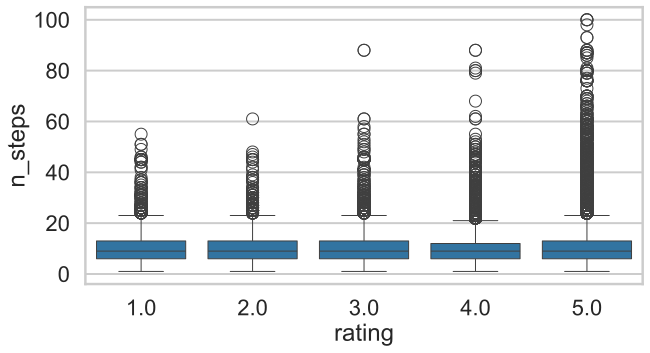

In [173]:
sns.boxplot(merged_df, x='rating', y='n_steps')

In [174]:
# Interesting Aggregate

In [175]:
top_40 = filtered_tags.value_counts()[:40]

In [176]:
# Tags to keep
tags_to_keep_15 = ['vegetarian', 'desserts', 'american', 'european', 'fruit', 'chicken', 'lunch', 'brunch', 'appetizers', 'breakfast', 'beef', 'breads', 'salads', 'cheese', 'asian']

# Filter the Series by these tags
top_15_recipes = top_40[top_40.index.isin(tags_to_keep_15)]
# we use tags to represent types of recipes, since there are lots of tags that represent characteristics of recipes rather than types of recipes
# we manually find the top 10 most common recipes which are the following
# caution: there may be repreated recipes since each recipe has multiple tags!!!!!!

In [177]:
# Precompute the set
tags_set = set(tags_to_keep_15)

# Use a vectorized approach with NumPy
filtered_df = merged_df[merged_df['tags'].map(lambda x: len(tags_set.intersection(x)) > 0)]

In [178]:
filtered_df.head()

name      id  minutes  contributor_id  \
0   1 brownies in the world    best ever  333281       40          985201   
6                 millionaire pound cake  286009      120          461724   
9                                5 tacos  500166       20         2549237   
10           50 chili   for the crockpot  501028      345         2628680   
11           50 chili   for the crockpot  501028      345         2628680   

     submitted  \
0   2008-10-27   
6   2008-02-12   
9   2013-05-13   
10  2013-05-28   
11  2013-05-28   

                                                                                                                                                                                                                                                                                                            tags  \
0                                                                                                                [60-minutes-or-less, time-to-make, course, main-ingredient, preparation, for-large-groups, desserts, lunch, snacks, cookies-and-brownies, chocolate, bar-cookies, brownies, number-of-servings]   
6                                                     [time-to-make, course, cuisine, preparation, occasion, north-american, desserts, american, southern-united-states, dinner-party, holiday-event, cakes, dietary, christmas, thanksgiving, low-sodium, low-in-something, taste-mood, sweet, 4-hours-or-less]   
9   [weeknight, 30-minutes-or-less, time-to-make, course, main-ingredient, preparation, occasion, main-dish, beef, vegetables, easy, diabetic, dinner-party, kid-friendly, stove-top, dietary, comfort-food, inexpensive, ground-beef, meat, greens, lettuces, tomatoes, taste-mood, equipment, 3-steps-or-less]   
10                                                                     [course, main-ingredient, cuisine, preparation, occasion, main-dish, soups-stews, beans, beef, pork, mexican, easy, stews, crock-pot-slow-cooker, spicy, lentils, meat, taste-mood, equipment, presentation, served-hot, 3-steps-or-less]   
11                                                                     [course, main-ingredient, cuisine, preparation, occasion, main-dish, soups-stews, beans, beef, pork, mexican, easy, stews, crock-pot-slow-cooker, spicy, lentils, meat, taste-mood, equipment, presentation, served-hot, 3-steps-or-less]   

                                        nutrition  n_steps  \
0        [138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]       10   
6   [878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]        7   
9        [249.4, 26.0, 4.0, 6.0, 39.0, 39.0, 0.0]        5   
10     [270.2, 19.0, 26.0, 48.0, 52.0, 21.0, 4.0]        4   
11     [270.2, 19.0, 26.0, 48.0, 52.0, 21.0, 4.0]        4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                steps  \
0   ['heat the oven to 350f and arrange the rack in the middle', 'line an 8-by-8-inch glass baking dish with aluminum foil', 'combine chocolate and butter in a medium saucepan and cook over medium-low heat , stirring frequently , until evenly melted', 'remove from heat and let cool to room temperature', 'combine eggs , sugar , cocoa powder , vanilla extract , espresso , and salt in a large bowl and briefly stir until just evenly incorporated', 'add cooled chocolate and mix unt

## Step 3: Assessment of Missingness

In [179]:
# Special Consideration
# There are only three columns in the merged dataset that contain missing values; make sure you’re using the merged dataset for all of your analysis (and that you followed the steps at the top of this page exactly).

In [180]:
missing_values = merged_df.isnull().sum()
missing_values[missing_values > 0]

name               1
description      114
user_id            1
recipe_id          1
date               1
rating         15036
review            58
rating_avg      2777
dtype: int64

In [181]:
# columns with missing values: rating, review, description
# dependent on: n_steps, minutes
df_mar = merged_df.copy()
df_mar['rating_missing'] = df_mar['rating'].isna()

In [182]:
stats1, obs1 = permutation_test(df_mar, 'n_steps', 'rating_missing', abs_diff_in_means)
p_val = (stats1 >= obs1).mean() 
p_val

np.float64(0.0)

In [183]:
fig = px.histogram(pd.DataFrame(stats1), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the Absolute Difference in Means')
fig.add_vline(x=obs1, line_color='red', line_width=1, opacity=1)
fig.add_annotation(text=f'<span style="color:red">Observed Absolute Difference in Means = {round(obs1, 2)}</span>',
                   x=2 * obs1, showarrow=False, y=0.07)

In [184]:
create_kde_plotly(df_mar, 'rating_missing', True, False, 'n_steps', " by Missingness of (MAR Example)")

In [185]:
stats2, obs2 = permutation_test(df_mar, 'minutes', 'rating_missing', abs_diff_in_means)
p_val = (stats2 >= obs2).mean() 
p_val

np.float64(0.114)

In [186]:
fig = px.histogram(pd.DataFrame(stats2), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the Absolute Difference in Means')
fig.add_vline(x=obs2, line_color='red', line_width=1, opacity=1)
fig.add_annotation(text=f'<span style="color:red">Observed Absolute Difference in Means = {round(obs2, 2)}</span>',
                   x=2 * obs2, showarrow=False, y=0.07)

In [187]:
create_kde_plotly(df_mar, 'rating_missing', True, False, 'minutes', " by Missingness of (MAR Example)")

## Step 4: Hypothesis Testing

In [188]:
# filter recipes with tags that include 'breakfast' or 'lunch' using the original raw recipes dataset
breakfast_lunch = recipes[recipes['tags'].apply(lambda x: 'breakfast' in x) | recipes['tags'].apply(lambda x: 'lunch' in x)]

# label each recipe as either 'breakfast' or 'lunch' using tags
breakfast_lunch = breakfast_lunch.assign(breakfast_lunch = recipes['tags'].apply(lambda x: 'breakfast' if 'breakfast' in x else 'lunch'))

In [189]:
# p-val < 0.01, reject the null, 
# meaning the average number of steps for breakfast and lunch have a significant difference
stats, obs = permutation_test(breakfast_lunch, 'n_steps', 'breakfast_lunch', abs_diff_in_means)
p_val = (stats >= obs).mean() 
p_val

np.float64(0.0)

## Step 5: Framing a Prediction Problem

In [190]:
# TODO

## Step 6: Baseline Model

In [191]:
preproc = make_column_transformer(
    (SimpleImputer(missing_values=np.nan, strategy='mean'), ['rating_avg']),
    (FunctionTransformer(np.log1p), ['minutes']),
    remainder='passthrough',
    force_int_remainder_cols=False
)

pl = make_pipeline(preproc, Poly, LinearRegression())

NameError: name 'make_column_transformer' is not defined

In [ ]:
X = merged_df[['minutes', 'n_ingredients', 'rating_avg']]
y = merged_df['n_steps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pl.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  ['rating_avg']),
                                                 ('functiontransformer-1',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['minutes']),
                                                 ('functiontransformer-2',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  ['n_ingredients'])])),
                ('linearregression', LinearRegression())])

In [ ]:
print(pl.score(X_train, y_train), pl.score(X_test, y_test))

0.22208755941386038 0.22411001917908469


In [ ]:
y_train_pred = pl.predict(X_train)
y_test_pred = pl.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred), root_mean_squared_error(y_test, y_test_pred))

5.676633464244048 5.696094918310805


## Step 7: Final Model

In [ ]:
preproc = make_column_transformer(
    (SimpleImputer(missing_values=np.nan, strategy='mean'), ['rating_avg']),
    (FunctionTransformer(np.log1p), ['minutes']),
    remainder='passthrough',
    force_int_remainder_cols=False
)

pl = make_pipeline(preproc, PolynomialFeatures(3), LinearRegression())

In [ ]:
X = merged_df[['minutes', 'n_ingredients', 'rating_avg']]
y = merged_df['n_steps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pl.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  ['rating_avg']),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['minutes'])])),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [ ]:
print(pl.score(X_train, y_train), pl.score(X_test, y_test))

0.24985000325997364 0.25390467705224107


In [ ]:
y_train_pred = pl.predict(X_train)
y_test_pred = pl.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred), root_mean_squared_error(y_test, y_test_pred))

5.574418245665839 5.585657529783438


## Step 8: Fairness Analysis

In [ ]:
# TODO